In [29]:
import gzip
from collections import defaultdict
import random
import scipy
from implicit import bpr
from collections import defaultdict
# from surprise import SVD, Reader, Dataset
# from surprise.model_selection import train_test_split
import math
import tensorflow as tf
from collections import defaultdict
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter


In [68]:
file_path = './archive/RAW_recipes.csv'

minutes = [] #index 2
tags = [] #index5
nutrition = [] #index 6
nsteps = [] #index7
steps = [] #index8
description = [] #index9
ingredients = [] #index10
ningredients = [] #index11

with open(file_path, 'r') as file:
    reader = csv.reader(file)
    count = 0
    for row in reader:
        count +=1
        if count == 1:
            continue
        minutes.append(int(row[2]))
        tags.append(row[5])
        nutrition.append(row[6])
        steps.append(row[8])
        description.append(row[9])
        ingredients.append(row[10])
        ningredients.append(row[11])    

        


36
73
110
149
188
235
295
366
441
526
624
755
915
1220
1465
1665
2295
3020
4415
7230
14400
21690
50410
2147483647
['0-36', '36-73', '73-110', '110-149', '149-188', '188-235', '235-295', '295-366', '366-441', '441-526', '526-624', '624-755', '755-915', '915-1220', '1220-1465', '1465-1665', '1665-2295', '2295-3020', '3020-4415', '4415-7230', '7230-14400', '14400-21690', '21690-50410', '50410-2147483647']
24
[36, 73, 110, 149, 188, 235, 295, 366, 441, 526, 624, 755, 915, 1220, 1465, 1665, 2295, 3020, 4415, 7230, 14400, 21690, 50410, 2147483647]


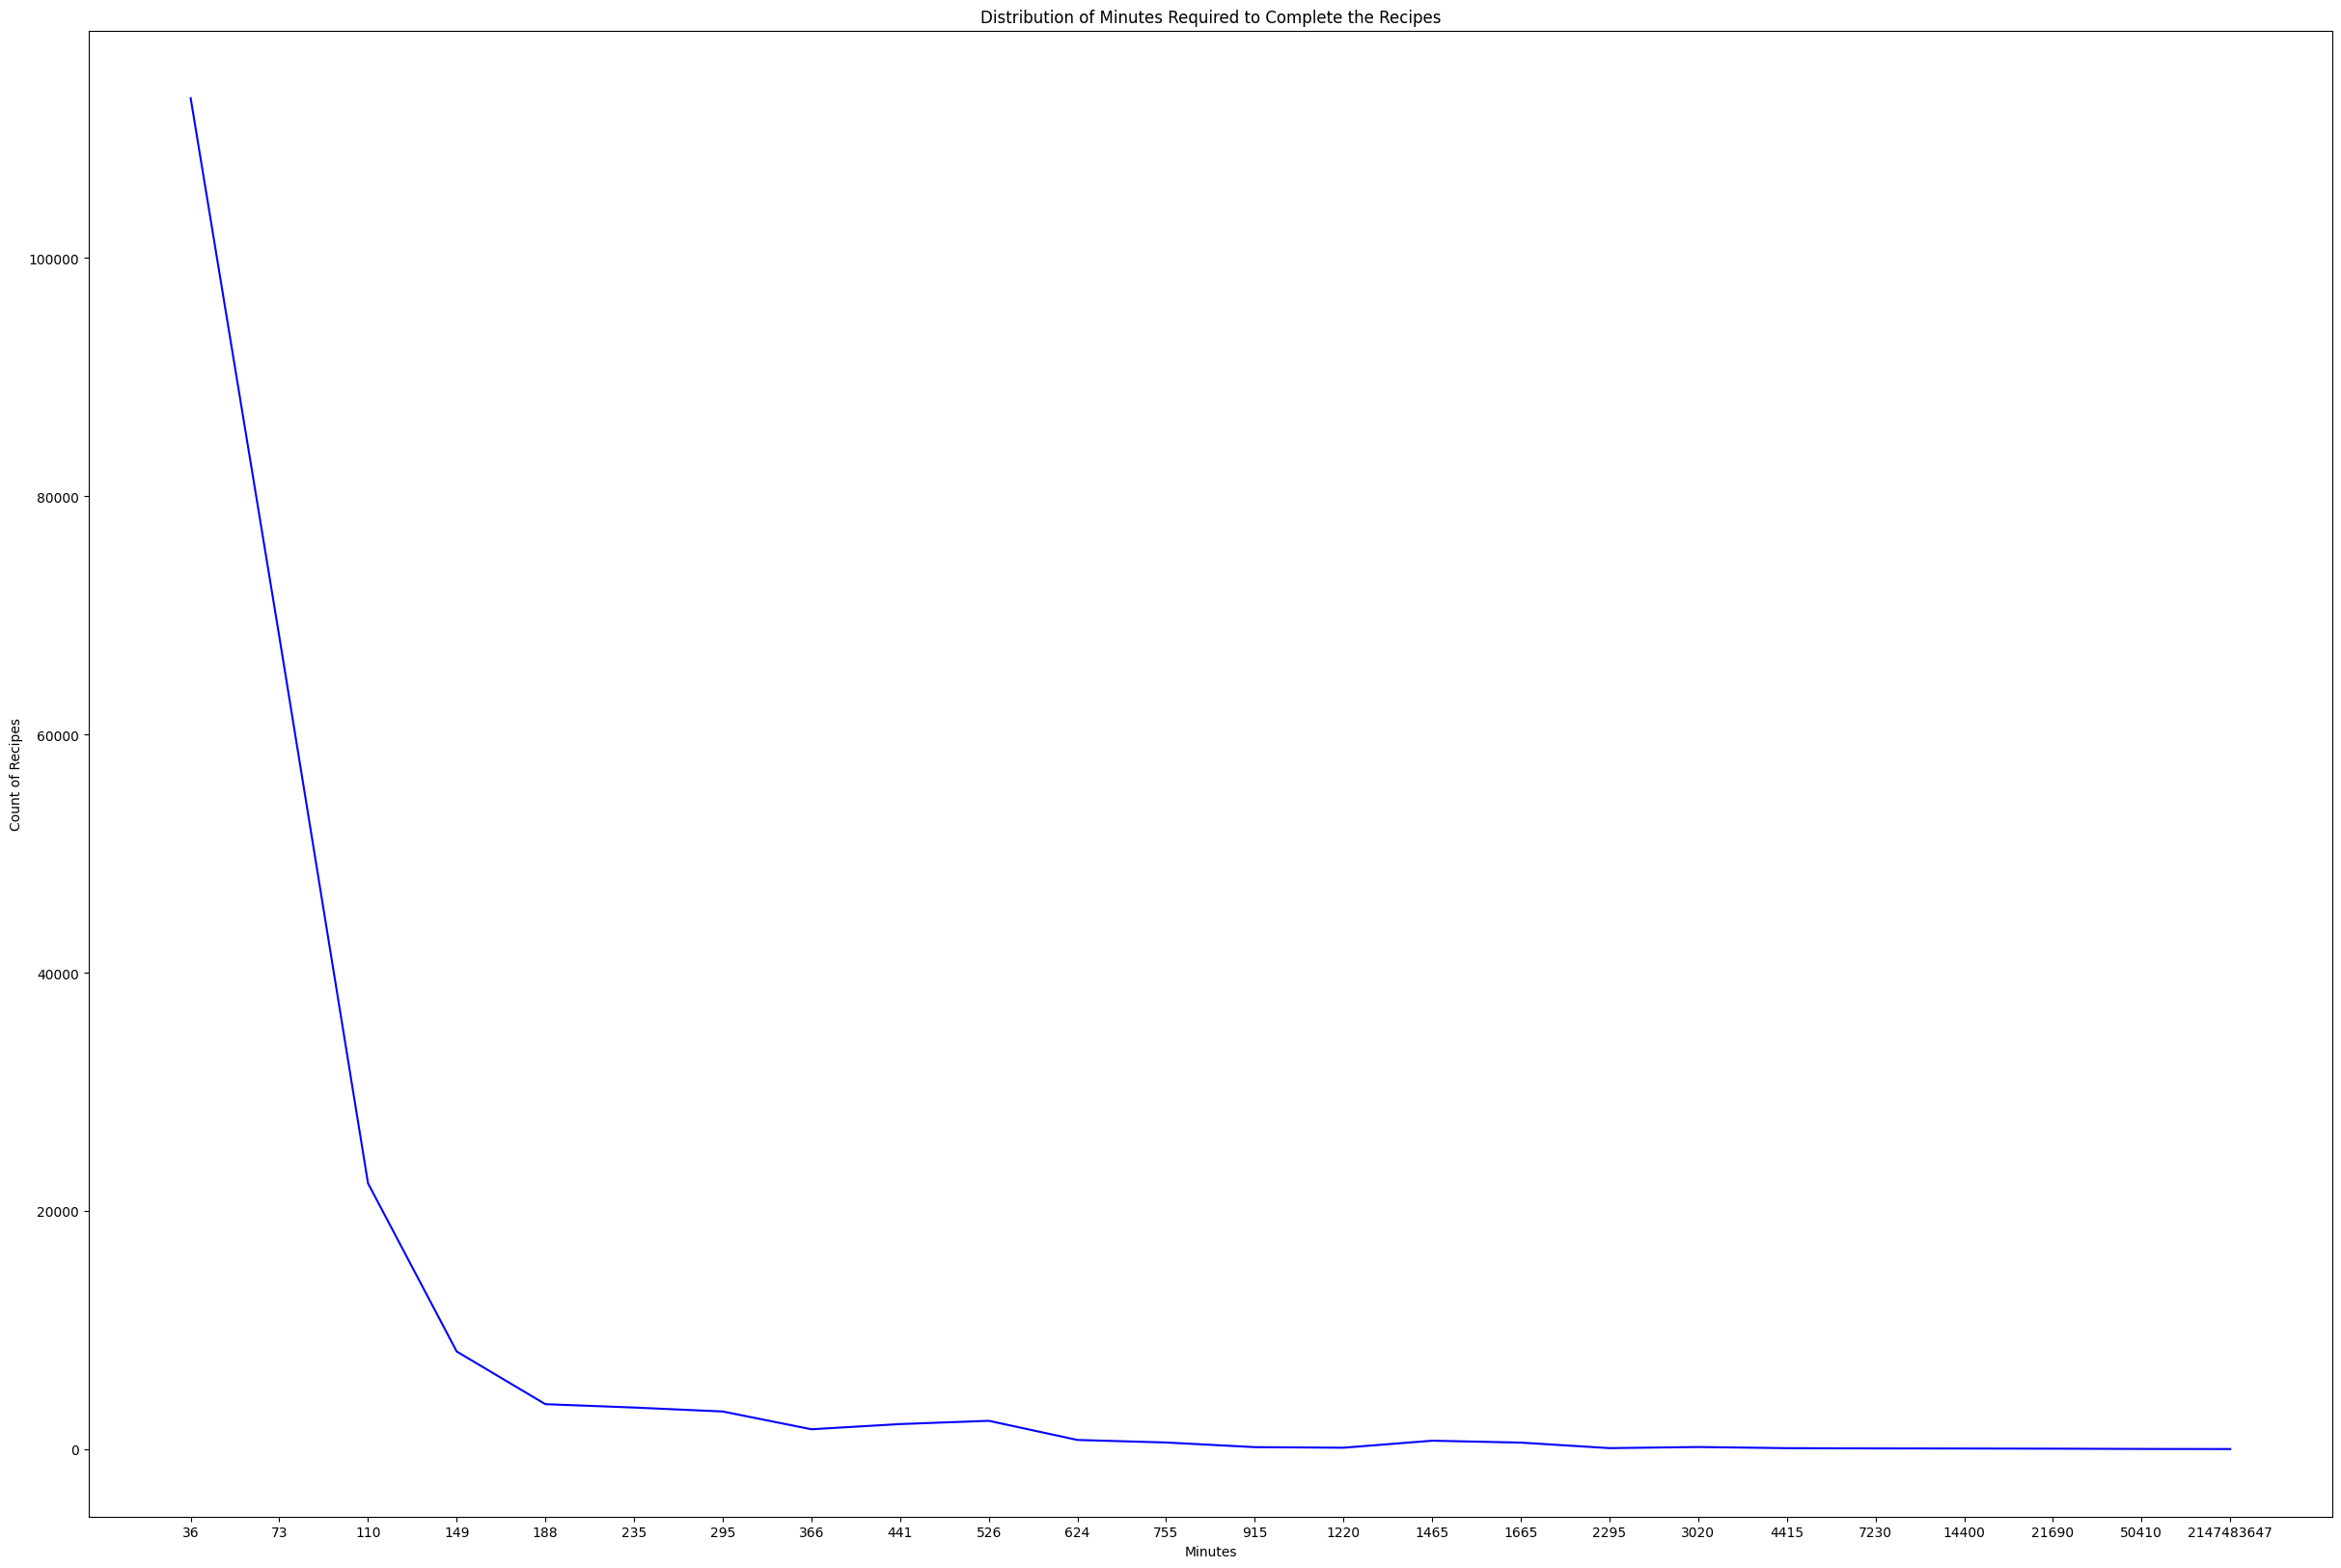

In [141]:
dict_minutes = defaultdict(int)
for i in minutes:
    dict_minutes[i] +=1

sorted_dictMinutes = sorted(dict_minutes.items())
sorted_minutes = []
sorted_freq  = []
for x in sorted_dictMinutes:
    sorted_freq.append(x[1])
    sorted_minutes.append(x[0])

# Given index range
index_start = 0
index_end = 887

# Define the number of intervals
num_intervals = 24

# Calculate the size of each interval
interval_size = (index_end - index_start + 1) // num_intervals

# Initialize the intervals
intervals = []

# Generate the intervals
for i in range(num_intervals):
    interval_start = index_start + i * interval_size
    interval_end = interval_start + interval_size - 1
    if i == 0:
        intervals.append((0, interval_end))
    else:
        intervals.append(( interval_start-1, interval_end))



# Print the intervals
list_intervals = []
interval_freqs = []
custom_intervals =[]

endval = 0
for interval in intervals:
    list_intervals.append(str(sorted_minutes[interval[0]]) + "-" + str(sorted_minutes[interval[1]]))
    custom_intervals.append(sorted_minutes[interval[0]])
    interval_freqs.append(sum(sorted_freq[interval[0]:interval[1]+1]))
    endval = sorted_minutes[interval[1]]
    print(endval)
    
custom_intervals.append(endval)
custom_intervals = custom_intervals[1:]

print(list_intervals)
print(len(interval_freqs))
print(custom_intervals)


plt.figure(figsize=(30, 20))  # Adjust the width and height as needed
positions = []
for i in range(num_intervals):
    positions.append(i)
plt.xticks(positions,custom_intervals)
# Create a bar plot
plt.plot(interval_freqs, color='blue', alpha=1)

# Add labels and title
plt.xlabel('Minutes')
plt.ylabel('Count of Recipes')
plt.title('Distribution of Minutes Required to Complete the Recipes')

# plt.xticks(custom_intervals)
# Show the plot
plt.show()

    
    
